# <span style="color: orange">K-Nearest Neighbors (KNN) Classification on Iris Dataset</span>  

* **Objective**: Understand and implement KNN for classification problems using the Iris dataset.

* **Tools**: Scikit-learn, Pandas, Matplotlib

**Step 1: Load & Normalize the Dataset**
* Load dataset
* Normalize features

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Iris.csv')
df.drop('Id', axis=1, inplace=True)
X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Step 2: Train/Test Split**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**Step 3: Train KNN and Evaluate Performance**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)


Matplotlib is building the font cache; this may take a moment.


* **Plot accuracy vs. K**

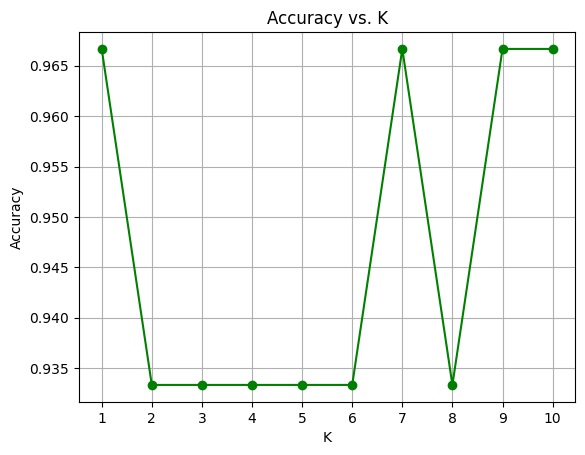

In [9]:
plt.plot(k_values, accuracies, marker='o',color = 'green')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Step 4: Confusion Matrix for Best K**

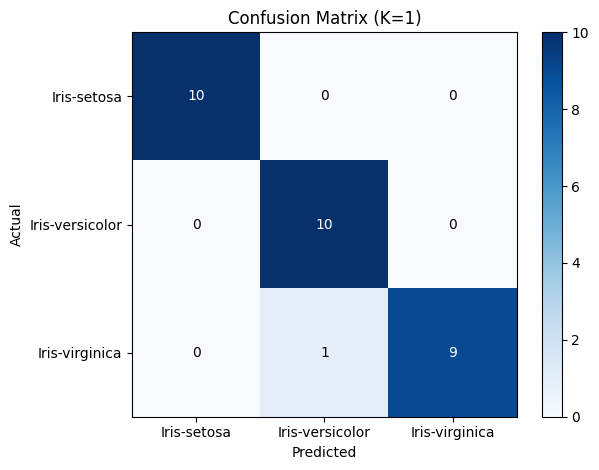

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

best_k = k_values[accuracies.index(max(accuracies))]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
classes = knn_best.classes_

plt.imshow(cm, cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)

for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.colorbar()
plt.tight_layout()
plt.show()

**Step 5: Visualize Decision Boundaries (Using First Two Features)**
*  2D projection
*  **Meshgrid**

In [19]:
from matplotlib.colors import ListedColormap
import numpy as np

X_2D = X_scaled[:, :2]
X_train2D, X_test2D, y_train2D, y_test2D = train_test_split(X_2D, y, test_size=0.2, random_state=42, stratify=y)

knn_2D = KNeighborsClassifier(n_neighbors=best_k)
knn_2D.fit(X_train2D, y_train2D)


KNeighborsClassifier(n_neighbors=1)

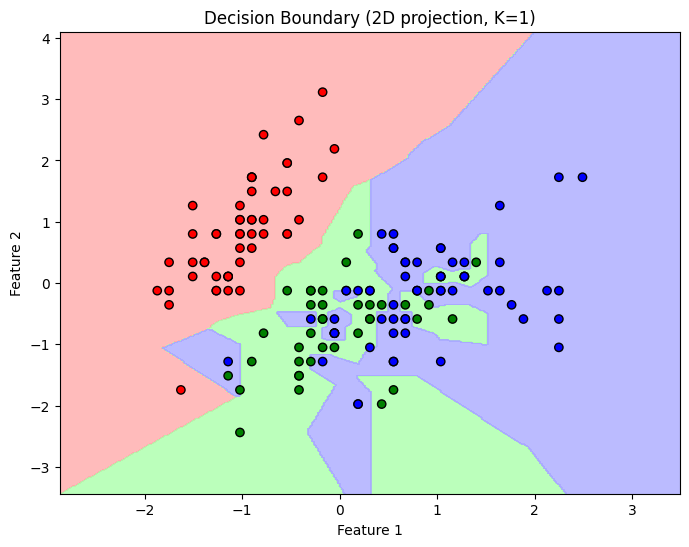

In [22]:
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.factorize(Z)[0].reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=pd.factorize(y)[0], edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
plt.title(f'Decision Boundary (2D projection, K={best_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
